In [2]:
%matplotlib inline
from __future__ import print_function, division, unicode_literals
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, MultipleLocator
from pygaarst import raster
import brewer2mpl

In [3]:
productdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/visual/figures//"

In [4]:
font = {'family' : 'Corbel',
        'weight' : 'bold',
        'size'   : 32}

mpl.rc('font', **font)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.default']='regular'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
mpl.rcParams['axes.color_cycle'] = colors

/Users/cwaigl/miniconda3/envs/snakes/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [5]:
outdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/visual/figures/"

In [6]:
# SI units except for lambda
h = 6.626068e-34  # Planck's constant, m^2 kg / s
c = 2.99792e8 # speed of light, m / s
kB = 1.38065e-23 # Boltzmann's constant, m^2 kg / s^2 / K

In [7]:
def specrad(lamb, T):
    # blackbody radiator radiance in W/m^2/um; T in C; lambda in nanometres
    lamb = lamb * 1.0e-9 # convert from micrometres to metres
    T = T + 273.15 # convert from C to K
    rad = 1.0e-6 * ( 2*h*c**2 ) / ( lamb**5*( np.exp( (h*c)/(lamb*kB*T) ) - 1 ) )
    return rad

def specradK(lamb, T):
    # blackbody radiator radiance in W/m^2/um; T in K; lambda in nanometres
    lamb = lamb * 1.0e-9 # convert from micrometres to metres
    rad = 1.0e-6 * ( 2*h*c**2 ) / ( lamb**5*( np.exp( (h*c)/(lamb*kB*T) ) - 1 ) )
    return rad

In [17]:
lambdas = np.arange(300, 2500, 50)
Ts = [200, 500, 800, 1100]
rads = [specrad(lambdas, temp) for temp in Ts]
Tlabel = [specrad(2200, temp+10) for temp in Ts]

TKs = [500, 800, 1100, 1400]
radKs = [specradK(lambdas, temp) for temp in TKs]
TKlabel = [specradK(2200, temp+10) for temp in TKs]


# (start-lambda, mid-lambda, stop-lambda, saturation, label)
# see http://landsat.usgs.gov/band_designations_landsat_satellites.php 
L7_ETMplus = [
    (.77, .835, .90, 149.6, 'B4'),
    (1.55, 1.65, 1.75, 31.06, 'B5'),
    (2.08, 2.22, 2.35, 10.80, 'B7'),
    (10.4, 11.45, 12.5, 17.04, 'B61'),
    (10.4, 11.45, 12.5, 12.65, 'B62'),
    ]

Hyp = [
    (400, 700, 1000, 816.9, 'VNIR'),
    (900, 1600, 2400, 408.5, 'SWIR')
]

## plot JUST spectral range for Hyperion

Celsius version

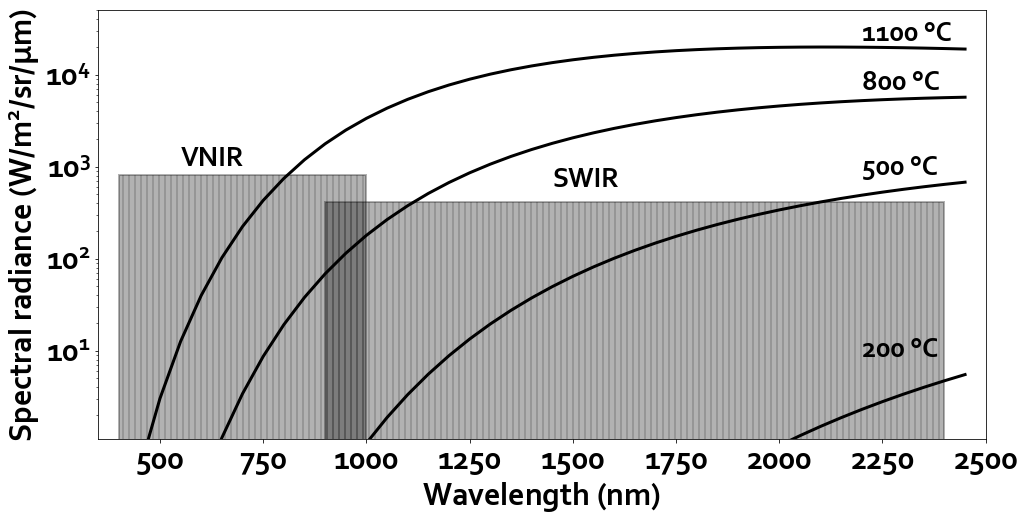

In [11]:
f = plt.figure(1, figsize=(15, 8))
ax = f.add_subplot(111)

ax.set_ylabel('Spectral radiance $(W / m^2 / sr / \mu m)$', font)
ax.set_xlabel('Wavelength $(nm)$', font)
    
ax.set_xlim(350, 2500)
ax.set_ylim(1.1, 50000)
Tlab = [specrad(2200, temp+50) for temp in Ts]
for temp, rad, lab in zip(Ts, rads, Tlab):
    ax.semilogy(lambdas, rad, lw=3, color="black", label=u"{} C".format(temp))
    ax.text(2200, lab, u'{} °C'.format(temp), fontsize=28)
for band in Hyp:
    rect = Rectangle(
        xy=[band[0], 0.01], width=band[2]-band[0], height=band[3], 
        hatch='||', alpha=0.3, zorder=10)
    rect.set_lw(2)
    rect.set_color('black')
    ax.add_artist(rect)
    ax.text(band[1]-150, band[3]+200, band[4], fontsize=28)
plt.tight_layout()


Kelvin vesion

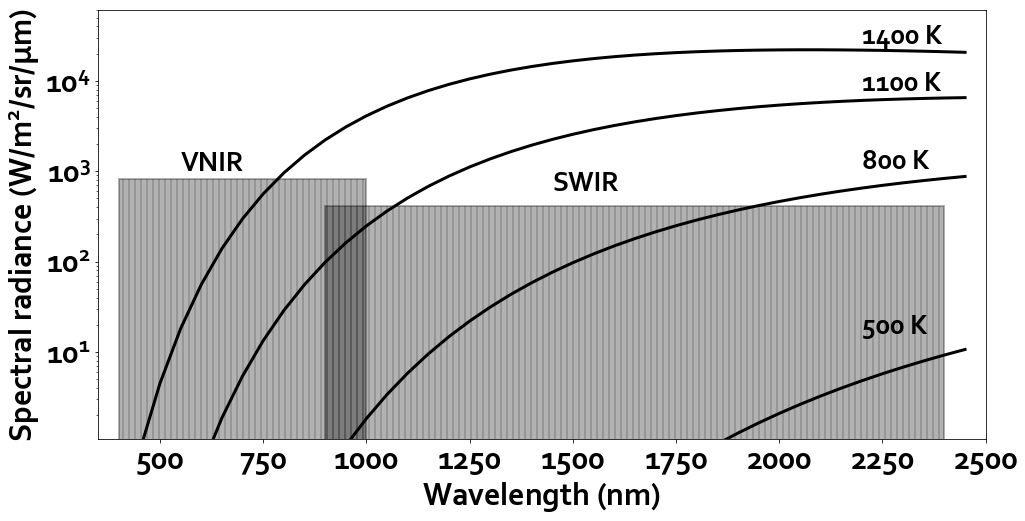

In [18]:
f = plt.figure(1, figsize=(15, 8))
ax = f.add_subplot(111)

ax.set_ylabel('Spectral radiance $(W / m^2 / sr / \mu m)$', font)
ax.set_xlabel('Wavelength $(nm)$', font)
    
ax.set_xlim(350, 2500)
ax.set_ylim(1.1, 60000)
Tlab = [specradK(2200, temp+50) for temp in TKs]
for temp, rad, lab in zip(TKs, radKs, Tlab):
    ax.semilogy(lambdas, rad, lw=3, color="black", label=u"{} K".format(temp))
    ax.text(2200, lab, u'{} K'.format(temp), fontsize=28)
for band in Hyp:
    rect = Rectangle(
        xy=[band[0], 0.01], width=band[2]-band[0], height=band[3], 
        hatch='||', alpha=0.3, zorder=10)
    rect.set_lw(2)
    rect.set_color('black')
    ax.add_artist(rect)
    ax.text(band[1]-150, band[3]+200, band[4], fontsize=28)
plt.tight_layout()

In [20]:
outfn = 'Fig02_LR.png'
f.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight')

## Also plot Hyperion radiance spectra

Load Hyperion data for Crazy fire

In [51]:
basedir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/HyspIRI_Prep_2014/"
dir_2004c = "2004Crazy"
hypscene_2004c = "EO1H0680132004192110KY"

In [38]:
hypsc = raster.Hyperionscene(os.path.join(basedir, dir_2004c, hypscene_2004c))
hypsc.infix = '_CLIP'

INFO:root:The value 2004 192 21:07:57 couldn't be parsed as int, float, date, time, datetime. Returning it as string.
INFO:root:The value 2004 192 21:09:12 couldn't be parsed as int, float, date, time, datetime. Returning it as string.


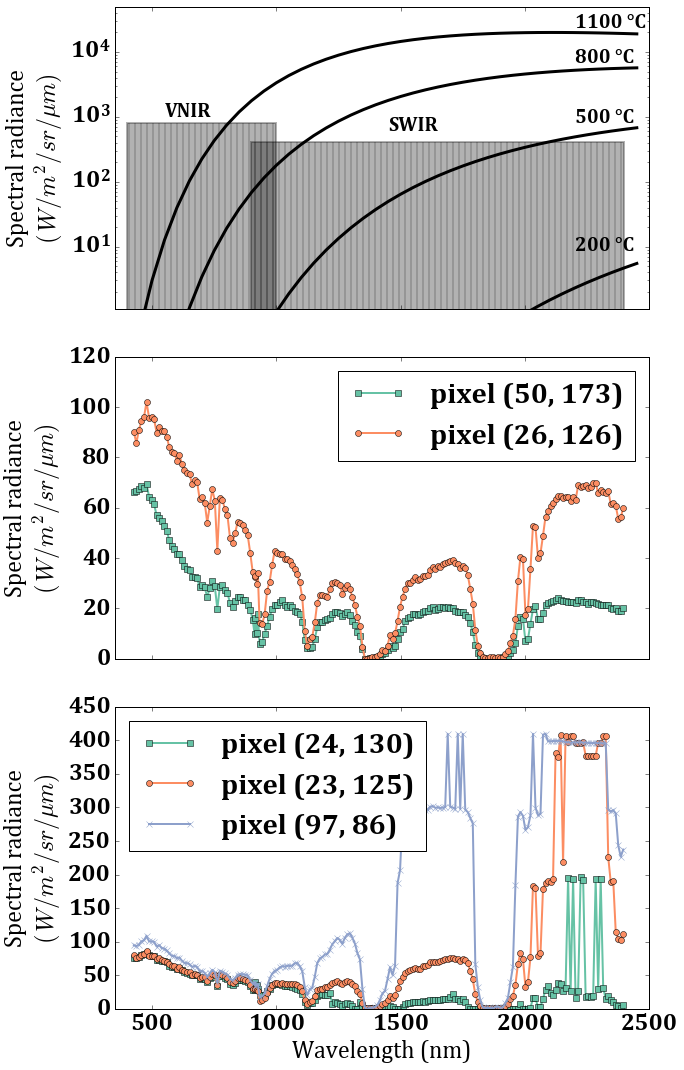

In [52]:
# Hyperion
f, axs = plt.subplots(3, figsize=(10, 15), sharex=True)

for ax in axs:
    ax.set_ylabel('Spectral radiance\n$(\,W / m^2 / sr / \mu m)$')
    
axs[0].set_xlim(350, 2500)
axs[0].set_ylim(1.1, 50000)
#axs[0].set_xlabel(r'Wavelength $(\mu m)$')
Tlab = [specrad(2200, temp+50) for temp in Ts]
for temp, rad, lab in zip(Ts, rads, Tlab):
    axs[0].semilogy(lambdas, rad, lw=3, color="black", label=u"{} C".format(temp))
    axs[0].text(2200, lab, u'{} °C'.format(temp), fontsize=20)
for band in Hyp:
    rect = Rectangle(
        xy=[band[0], 0.01], width=band[2]-band[0], height=band[3], 
        hatch='||', alpha=0.3, zorder=10)
    rect.set_lw(2)
    rect.set_color('black')
    axs[0].add_artist(rect)
    axs[0].text(band[1]-150, band[3]+200, band[4], fontsize=20)
plt.tight_layout()

axs[1].plot(
    hypsc.calibratedwavelength_nm, hypsc.spectrum(50, 173), 
    's-', linewidth=2, 
    label="pixel ({}, {})".format(50, 173))
axs[1].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(26, 126), 
        'o-', linewidth=2,
    label="pixel ({}, {})".format(26, 126))
axs[1].legend()

axs[2].plot(
    hypsc.calibratedwavelength_nm, hypsc.spectrum(24, 130), 
    's-', linewidth=2, 
    label="pixel ({}, {})".format(24, 130))
axs[2].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(23, 125), 
        'o-', linewidth=2,
    label="pixel ({}, {})".format(23, 125))
axs[2].plot(hypsc.calibratedwavelength_nm, hypsc.spectrum(97, 86), 
        'x-', linewidth=2, 
    label="pixel ({}, {})".format(97, 86))
axs[2].legend(loc=0)
axs[2].set_xlabel("Wavelength (nm)")



In [53]:
outfn = 'Fig02_LR.png'
f.savefig(os.path.join(productdir, outfn), dpi=150, bb_inches='tight')

In [54]:
outfn = 'Fig02.png'
f.savefig(os.path.join(productdir, outfn), dpi=300, bb_inches='tight')